# ISYE7750 Fall2022 HW4 Problem 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

## (a)

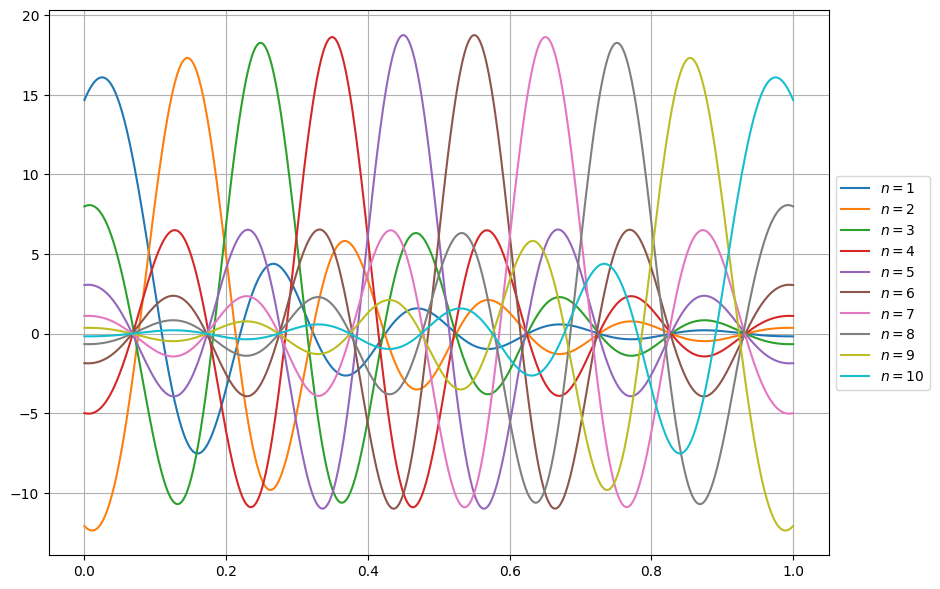

In [49]:
# Basis of Tn
d = 1000
phi = lambda z: np.exp(-z**2)
t = np.linspace(0,1,d)
N = 10  #! CHANGE THIS VALUE

# We want to find the coefficients "alpha" from the Gram Matrix
## Here we compute the Gram Matrix using inner products of the bases 
G = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        vdv = lambda z: phi(N*z - (i + 1) + 0.5) * phi(N*z - (j + 1) + 0.5)
        G[i,j], _ = integrate.quad(vdv, 0, 1)

# Compute the dual basis 
H = np.linalg.inv(G)  # invert the Gram matrix
phi_tilde = np.zeros((d,N))
fig = plt.figure(figsize=(9.5,6))
for i in range(N):
    tmp = np.zeros((1,d))
    for j in range(N):
        v = lambda z: phi(N*z - (j + 1) + 0.5)
        tmp += H[i,j] * v(t)
        
    phi_tilde[:,i] = tmp
    plt.plot(t, phi_tilde[:,i].reshape(d,-1), label="$n="+str(i+1)+"$")
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.savefig("plots/phi_dual_basis.png")

## (b)

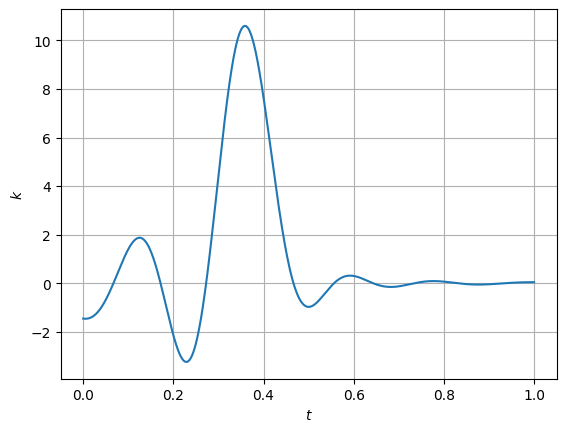

In [42]:
# Compute the kernel for \tau = 0.371238
tau = 0.371238
k_tau = np.zeros((d,1))
for i in range(N):
    v = lambda z: phi(N*z - (i + 1) + 0.5)
    k_tau += (v(tau) * phi_tilde[:,i]).reshape(d,-1)
plt.plot(t, k_tau)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$k$")
plt.savefig("plots/k_tau.png")

In [43]:
# plot f with random alphas 
alpha = np.random.randn(N)
print(alpha)

# f(tau)
f = 0
for i in range(N):
    v = lambda z: phi(N*z - (i + 1) + 0.5)
    f += alpha[i] * v(tau)
print("f(tau): {0}".format(f))

# <f,k_tau>
ft = np.zeros((d,1))
for i in range(N):
    v = lambda z: phi(N*z - (i + 1) + 0.5)
    ft += (alpha[i] * v(t)).reshape(d,-1)
f_kern = ft.T @ k_tau / d
print("f_kern(tau): {0}".format(f_kern[0,0]))

[ 0.16297435  0.35832125 -0.30955382 -2.09647156 -0.20179661 -0.32785131
 -0.75917732 -1.83265116 -0.40851454 -0.38718945]
f(tau): -2.19476876000734
f_kern(tau): -2.192700414550825


## (c)

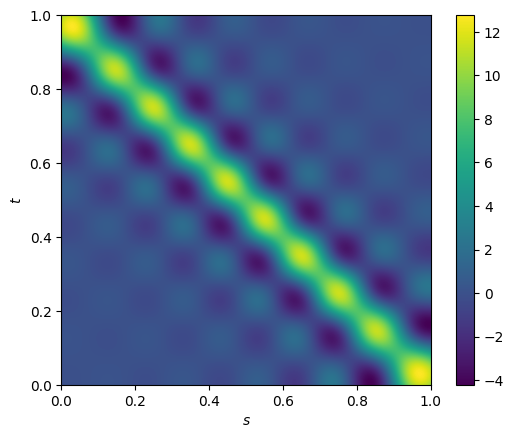

In [44]:
# Compute the kernel image
tau = np.linspace(0,1,d)
k_tau = np.zeros((d,d))
for i, tau_i in enumerate(tau):
    for j in range(N):
        v = lambda z: phi(N*z - (j + 1) + 0.5)
        k_tau[:,i] += (v(tau_i) * phi_tilde[:,j])
        
fig, ax = plt.subplots()
shw = ax.imshow(k_tau, extent=[0, 1, 0, 1])
bar = plt.colorbar(shw)
plt.xlabel("$s$")
plt.ylabel("$t$")
plt.savefig("plots/kernel_image.png")